---
title: Explore EOPF Zarr Sentinel-2 files using GDAL
subtitle: Explore how to open, visualise and plot Sentinel-2 L1C MSI EOPF Zarr format
authors:
  - name: Michele Claus
    orcid: 0000-0003-3680-381X
    github: clausmichele
    affiliations:
      - id: Eurac Research
        institution: Eurac Research
        ror: 01xt1w755
  - name: Suriyah Dhinakaran
    orcid: 0009-0007-0355-7372
    github: suriyahgit
    affiliations:
      - id: Eurac Research
        institution: Eurac Research
        ror: 01xt1w755
  - name: Yuvraj Bhagwan Adagale
    orcid: 0009-0008-1259-3399
    github: Yuvraj198920
    affiliations:
      - id: Eurac Research
        institution: Eurac Research
        ror: 01xt1w755
date: 2025-04-25
thumbnail: ../static/ESA_EOPF_logo_2025_COLOR_ESA_blue_reduced.png
keywords: ["gdal", "earth observation", "remote sensing"]
tags: ["sentinel-2", "gdal", "land"]
releaseDate: 2025-04-25
datePublished: 2025-04-25
dateModified: 2025-05-20
---

```{image} ../static/ESA_EOPF_logo_2025_COLOR_ESA_blue_reduced.png
:alt: ESA EOPF Zarr Logo
:width: 250px
:align: center
```

# Explore EOPF Zarr Sentinel-2 files using GDAL

## Table of Contents

1. [Introduction](#introduction_GDALEXP) 
2. [Import Libraries](#import_libraries_GDALEXP) 
3. [Building GDAL Connection](#building_gdal_connection_GDALEXP) 
4. [Exploring the Zarr Dataset](#exploring_dataset_GDALEXP) 
5. [Metadata Extraction](#metadata_extraction_GDALEXP) 
6. [Data Visualization](#data_visualization_GDALEXP) 


(introduction_GDALEXP)=
## Introduction

This notebook demonstrates accessing and visualizing Sentinel-2 satellite imagery stored in ZARR format using GDAL. Learn to connect to remote ZARR files, extract metadata, and visualize multispectral bands.

:::{hint} Overview
**Questions**
- How do I access Sentinel-2 L1C in EOPF Zarr format?
- How can I plot the Sentinel-2 tile location on a map?
- How do I plot a RGB image of the selected scene?


**Objectives**
- Being able to open a Sentinel-2 L1C EOPF Zarr product from an object storage
- Understanding the product structure and how to get specific bands

:::

(import_libraries_GDALEXP)=
## Import Libraries

In [9]:
from osgeo import gdal
import matplotlib.pyplot as plt

(building_gdal_connection_GDALEXP)=
## Building GDAL Connection

**Note:** Always prepend `ZARR:"/vsicurl/` to ZARR file paths

In [10]:
dsn = 'ZARR:"/vsicurl/https://objectstore.eodc.eu:2222/e05ab01a9d56408d82ac32d69a5aae2a:sample-data/tutorial_data/cpm_v253/S2B_MSIL1C_20250113T103309_N0511_R108_T32TLQ_20250113T122458.zarr"'

(exploring_dataset_GDALEXP)=
## Exploring the Zarr Dataset

In [11]:
ds = gdal.Open(dsn, gdal.GA_ReadOnly)
if ds is None:
    raise RuntimeError("Failed to open the Zarr dataset with GDAL.")

In [12]:
print("Dataset opened successfully!")
print("Metadata:", ds.GetMetadata())

Dataset opened successfully!
Metadata: {}


(metadata_extraction_GDALEXP)=
## Metadata Extraction

In [13]:
sub_ds = ds.GetSubDatasets()
for idx, s in enumerate(sub_ds[:5]):  # Show first 5 subdatasets
    print(f"{idx}: {s[0]}")

0: ZARR:"/vsicurl/https://objectstore.eodc.eu:2222/e05ab01a9d56408d82ac32d69a5aae2a:sample-data/tutorial_data/cpm_v253/S2B_MSIL1C_20250113T103309_N0511_R108_T32TLQ_20250113T122458.zarr":/conditions/geometry/angle
1: ZARR:"/vsicurl/https://objectstore.eodc.eu:2222/e05ab01a9d56408d82ac32d69a5aae2a:sample-data/tutorial_data/cpm_v253/S2B_MSIL1C_20250113T103309_N0511_R108_T32TLQ_20250113T122458.zarr":/conditions/geometry/band
2: ZARR:"/vsicurl/https://objectstore.eodc.eu:2222/e05ab01a9d56408d82ac32d69a5aae2a:sample-data/tutorial_data/cpm_v253/S2B_MSIL1C_20250113T103309_N0511_R108_T32TLQ_20250113T122458.zarr":/conditions/geometry/detector
3: ZARR:"/vsicurl/https://objectstore.eodc.eu:2222/e05ab01a9d56408d82ac32d69a5aae2a:sample-data/tutorial_data/cpm_v253/S2B_MSIL1C_20250113T103309_N0511_R108_T32TLQ_20250113T122458.zarr":/conditions/geometry/x
4: ZARR:"/vsicurl/https://objectstore.eodc.eu:2222/e05ab01a9d56408d82ac32d69a5aae2a:sample-data/tutorial_data/cpm_v253/S2B_MSIL1C_20250113T103309_N051

In [14]:
target_subds = gdal.Open(sub_ds[80][0], gdal.GA_ReadOnly)
print("Band metadata:", target_subds.GetMetadata())

Band metadata: {'_eopf_attrs': '{ "add_offset": -0.1, "coordinates": [ "x", "y" ], "dimensions": [ "y", "x" ], "fill_value": 0, "scale_factor": 0.0001, "units": "digital_counts" }', 'dtype': '<u2', 'fill_value': '0', 'long_name': 'TOA reflectance from MSI acquisition at spectral band b01 442.3 nm', 'proj:bbox': '{300000,4890240,409800,5000040}', 'proj:epsg': '32632', 'proj:shape': '{1830,1830}', 'proj:transform': '{60,0,300000,0,-60,5000040,0,0,1}', 'proj:wkt2': 'PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["

(data_visualization_GDALEXP)=
## Data Visualization

In [15]:
band = target_subds.GetRasterBand(1)
data = band.ReadAsArray()
print(f"Data dimensions: {data.shape}")

Data dimensions: (1830, 1830)


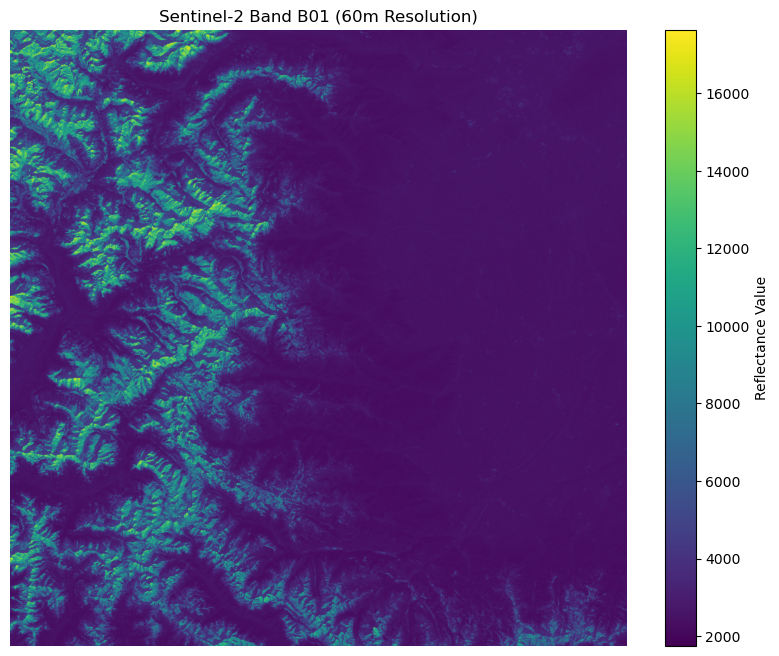

In [16]:
plt.figure(figsize=(10, 8))
plt.imshow(data, cmap="viridis")
plt.colorbar(label="Reflectance Value")
plt.title("Sentinel-2 Band B01 (60m Resolution)")
plt.axis("off")
plt.show()

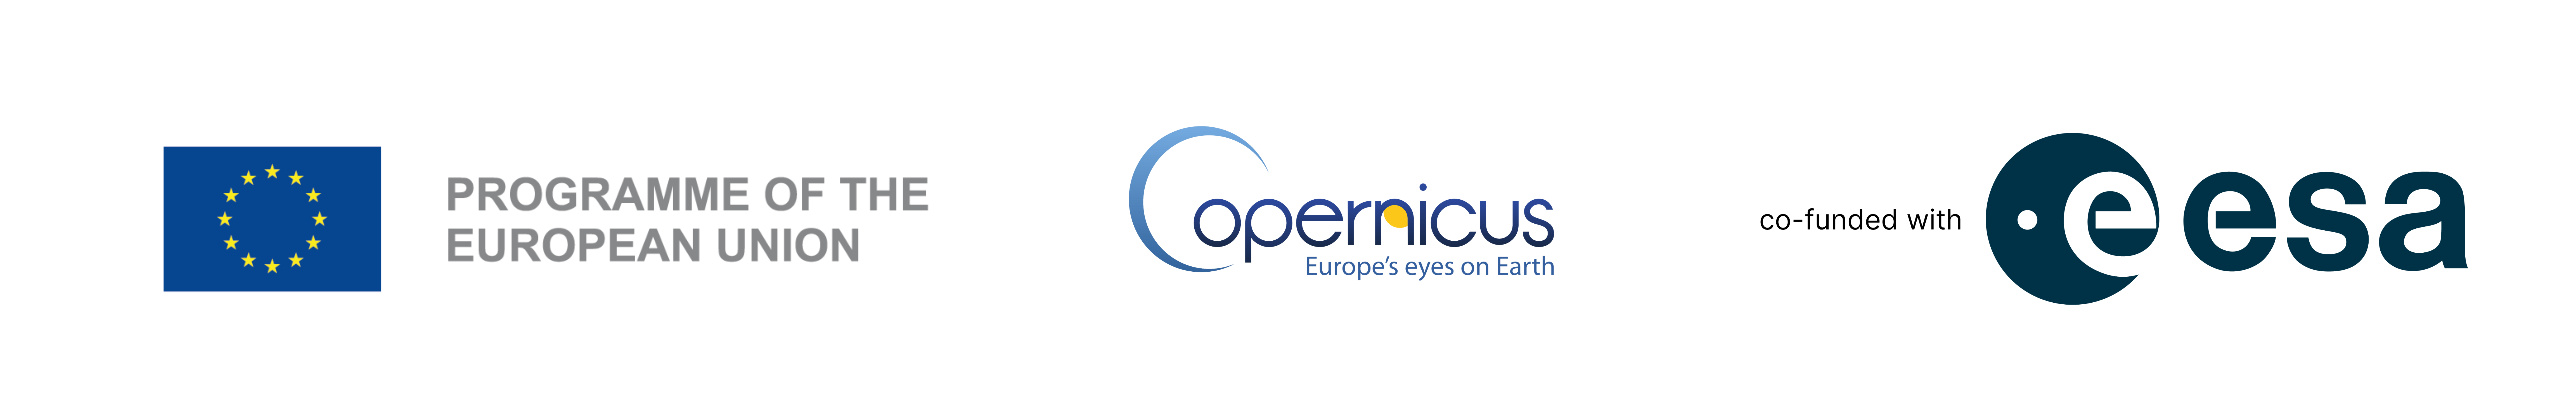